In [36]:
___Author___='LumberJack Jyss'


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
import talib

In [38]:
package_dir = os.path.dirname(os.path.abspath('Predict_LSTM.ipynb'))
#LeChemin = '/'+package_dir+'/20191211 BACKTEST/'
LeChemin = ''
list_dir = os.listdir(LeChemin+'DL_2019-12-06/.')

In [39]:
package_dir,LeChemin

('/Users/YTsBaCh/Documents/DATA SCIENCES/20191211 BACKTEST', '')

In [40]:
LaBase = pd.read_csv(LeChemin+'LaBase_09.csv')
LaBase.index = pd.to_datetime(LaBase['Date'],format='%Y-%m-%d')
LaBase = LaBase.drop(['Date'],axis=1)
LaBase.iloc[:,1:] = LaBase.iloc[:,1:].astype(float)
LaBase.head()

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-12-07,A,41.099998,40.540001,40.919998,40.700001,2004500.0,39.174011
2015-12-08,A,41.279999,40.419998,40.610001,41.169998,4331800.0,39.626396
2015-12-09,A,41.799999,40.910000,41.250000,40.980000,4133300.0,39.443512
2015-12-10,A,41.660000,40.650002,40.959999,41.250000,3709200.0,39.703396
2015-12-11,A,40.750000,40.060001,40.750000,40.189999,2634400.0,38.683136


In [41]:
df = LaBase[LaBase['Symbol']=='AMZN']
df = df.drop(['Symbol'],axis=1)
s= -5

In [42]:
%%time
print('Preparing data...')
df['Momentum']  = df['Volume'] * (df['Open'] - df['Close'])
df['Avg_price'] = (df['Low'] + df['High'])/2
df['Range']     = df['High'] - df['Low']
df['Ohlc_price'] = (df['Low'] + df['High'] + df['Open'] + df['Close'])/4
df['Oc_diff']    = df['Open'] - df['Close']
rsi = talib.RSI(df['Close'],timeperiod=14)
stoc_slowk, stoc_slowd = talib.STOCH(df['High'],df['Low'],df['Close'])
upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(df['Close'],timeperiod=5)
sma8 = talib.SMA(df['Close'],timeperiod=8)
sma10 = talib.SMA(df['Close'],timeperiod=10)
sma12 = talib.SMA(df['Close'],timeperiod=12)
sma15 = talib.SMA(df['Close'],timeperiod=15)
sma30 = talib.SMA(df['Close'],timeperiod=30)
sma35 = talib.SMA(df['Close'],timeperiod=35)
sma40 = talib.SMA(df['Close'],timeperiod=40)
sma45 = talib.SMA(df['Close'],timeperiod=45)
sma50 = talib.SMA(df['Close'],timeperiod=50)
atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=10)
delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50
bbdelta = upper - middle
price_bolup = df['Close'] - lower
price_bolow = df['Close'] - upper
Ema = talib.EMA(df['Close'],timeperiod=20)
KC_High = Ema + 2*atr
KC_Low = Ema - 2*atr
aroondown, aroonup = talib.AROON(df['High'], df['Low'], timeperiod=9)
aroon = aroonup - aroondown #(aroonup-aroondown)/abs((aroonup-aroondown))
rsi30_list = []
rsi70_list = []
for i in range(0,df.shape[0]):
    rsi70_list.append(70 - rsi[i])
    rsi30_list.append(rsi[i] - 30)
    #except:
        #   rsi70_list.append(0)
        #  rs30_list.append(0)
varop_spy = df['Open'] - df['Close']
varhl_spy = df['High'] - df['Low']
df['Varop_Spy'] = varop_spy
df['Varhl_spy'] = varhl_spy
df['RSI'] = rsi
df['70 - RSI'] = np.array(rsi70_list)
df['RSI - 30'] = np.array(rsi30_list)
df['BBD_Delta_Up'] = bbdelta
df['delta5_8'] = delta5_8
df['delta8_10'] = delta8_10
df['delta10_12'] = delta10_12
df['delta12_15'] = delta12_15
df['delta15_30'] = delta15_30
df['delta30_35'] = delta30_35
df['delta35_40'] = delta35_40
df['delta40_45'] = delta40_45
df['delta45_50'] = delta45_50
df['Stoc_Slowk'] = stoc_slowk
df['Stoc_Slowd'] = stoc_slowd
df['KC_High'] = KC_High
df['KC_Low'] = KC_Low
df['upper'] = upper
df['lower'] = lower
df['var_bollup_kchigh'] = upper-KC_High
df['var_bolllow_kclow'] = lower-KC_Low
df['Aroon Up'] = aroonup
df['Aroon Down'] = aroondown
df['Delta Aroon'] = aroon
up = []
down = []
df['Volume'] = df['Volume'].shift(s) - df['Volume']
df['Target'] = df['Close'] - df['Close'].shift(s)
df = df.drop((['Close','High','Open','Low','upper','lower','KC_High','KC_Low','Avg_price','Ohlc_price']),axis=1)
df.rename(columns=lambda x: x.replace('Adj Close', 'Close'), inplace=True)
df = df.dropna()
df.head()


'''
df = df[['High','Low','Open','Volume','Close','Varop_Spy','Varhl_spy','RSI','70 - RSI','RSI - 30',\
'BBD_Delta_Up','delta5_8','delta8_10','delta10_12','delta12_15','delta15_30','delta30_35','delta35_40',\
'delta40_45','delta45_50','Stoc_Slowk','Stoc_Slowd','KC_High','KC_Low','upper','lower','var_bollup_kchigh',\
'var_bolllow_kclow','Aroon Up','Aroon Down','Delta Aroon','Close.S']]
'''


Preparing data...
CPU times: user 73 ms, sys: 2.79 ms, total: 75.7 ms
Wall time: 74.2 ms


In [43]:
from sklearn.decomposition import PCA
dataset = df.copy()
dataset = dataset.values.astype('float32')
pca_features = list(df)

In [44]:
pca = PCA(n_components=1)
df['PCA'] = pca.fit_transform(dataset)

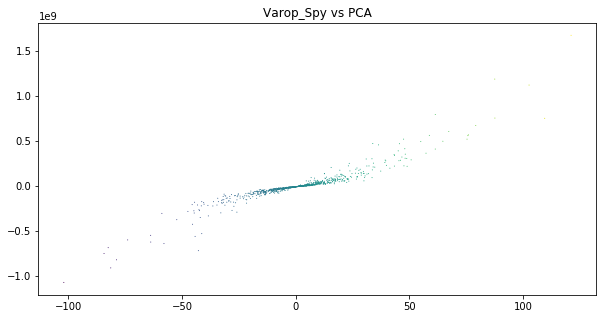

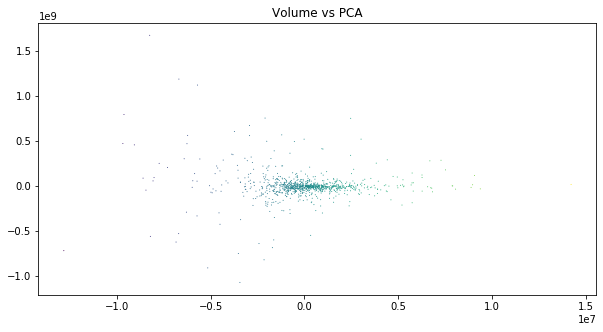

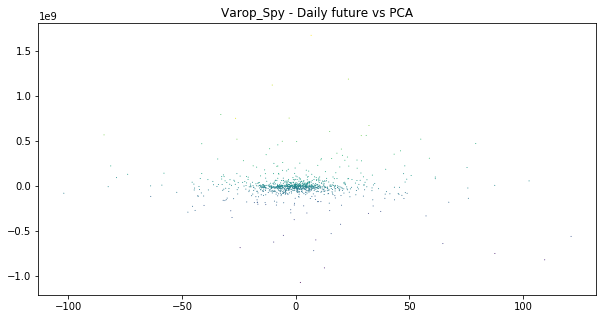

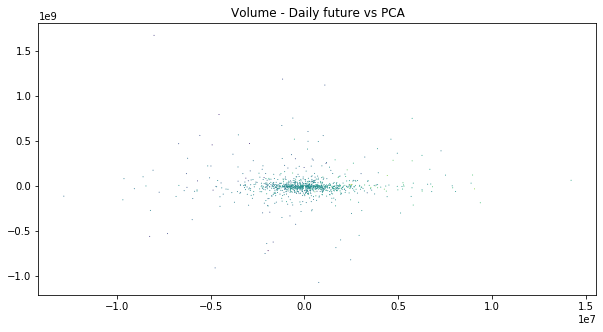

In [45]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import pylab

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Varop_Spy'].values.min(), df['Varop_Spy'].values.max())
color = cm.viridis(norm(df['Varop_Spy'].values))
plt.scatter(df['Varop_Spy'].values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Varop_Spy vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Volume'].values.min(), df['Volume'].values.max())
color = cm.viridis(norm(df['Volume'].values))
plt.scatter(df['Volume'].values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Volume vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Varop_Spy'].values.min(), df['Varop_Spy'].values.max())
color = cm.viridis(norm(df['Varop_Spy'].values))
plt.scatter(df['Varop_Spy'].shift().values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Varop_Spy - Daily future vs PCA')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['Volume'].values.min(), df['Volume'].values.max())
color = cm.viridis(norm(df['Volume'].values))
plt.scatter(df['Volume'].shift().values, df['PCA'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.99, s=1)
plt.title('Volume - Daily future vs PCA')
plt.show()

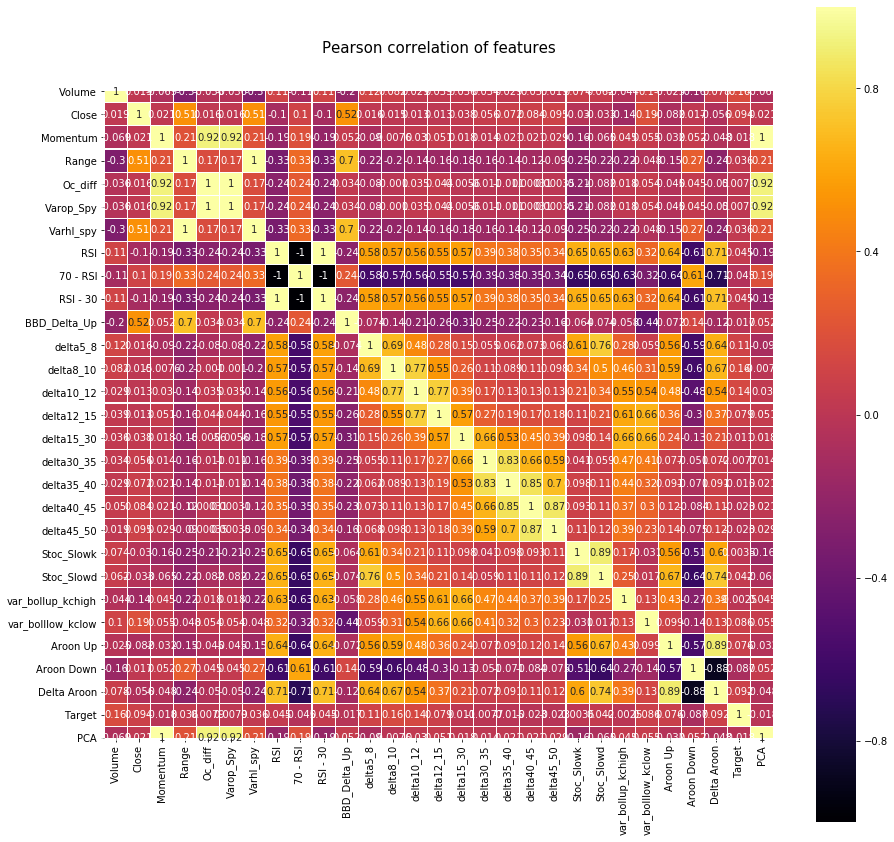

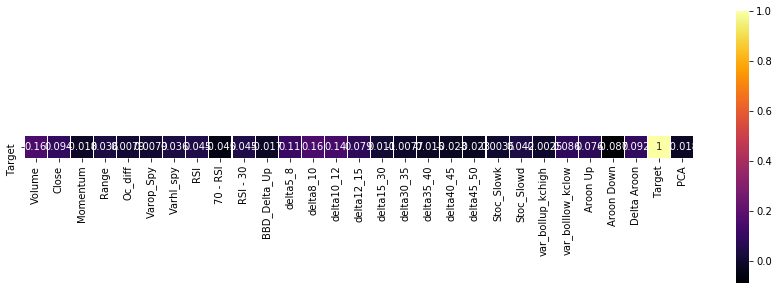

In [47]:
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr[corr.index == 'Target'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [48]:
def create_dataset(dataset, look_back=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Scale and create datasets
target_index = df.columns.tolist().index('Target')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

X, y = create_dataset(dataset, look_back=1)
y = y[:,target_index]
X = np.reshape(X, (X.shape[0], X.shape[2]))

In [50]:
df.columns.tolist().index('Target')

27

In [51]:
forest = RandomForestRegressor(n_estimators = 100)
forest = forest.fit(X, y)

Feature ranking:
0. Target 27 (0.648791)
1. Volume 0 (0.029311)
2. delta45_50 19 (0.025819)
3. delta12_15 14 (0.021826)
4. var_bollup_kchigh 22 (0.019643)
5. delta15_30 15 (0.017675)
6. delta8_10 12 (0.016160)
7. Close 1 (0.016155)
8. delta5_8 11 (0.016042)
9. BBD_Delta_Up 10 (0.015588)
10. var_bolllow_kclow 23 (0.015158)
11. delta35_40 17 (0.013673)
12. delta30_35 16 (0.013578)
13. delta10_12 13 (0.013569)
14. delta40_45 18 (0.012369)
15. Stoc_Slowk 20 (0.011828)
16. Oc_diff 4 (0.010046)
17. Range 3 (0.009814)
18. Varhl_spy 6 (0.009552)
19. Varop_Spy 5 (0.009541)
20. Delta Aroon 26 (0.008931)
21. Stoc_Slowd 21 (0.008022)
22. 70 - RSI 8 (0.006485)
23. Momentum 2 (0.006376)
24. PCA 28 (0.005917)
25. RSI - 30 9 (0.005755)
26. RSI 7 (0.005339)
27. Aroon Down 25 (0.003620)


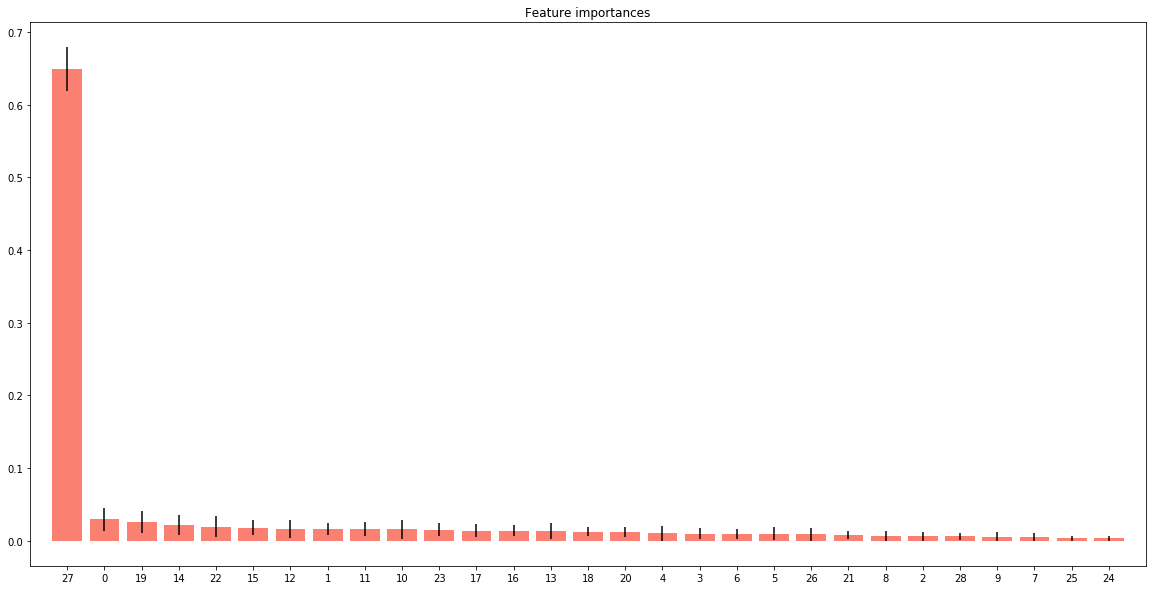

In [52]:
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for forest in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

column_list = df.columns.tolist()
print("Feature ranking:")
for f in range(X.shape[1]-1):
    print("%d. %s %d (%f)" % (f, column_list[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="salmon", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

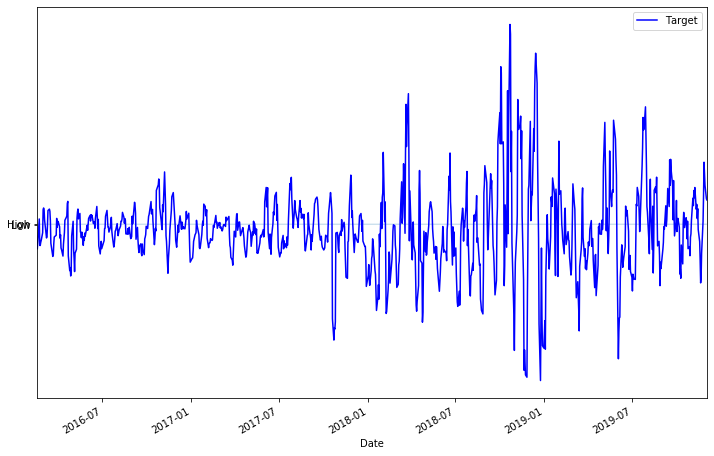

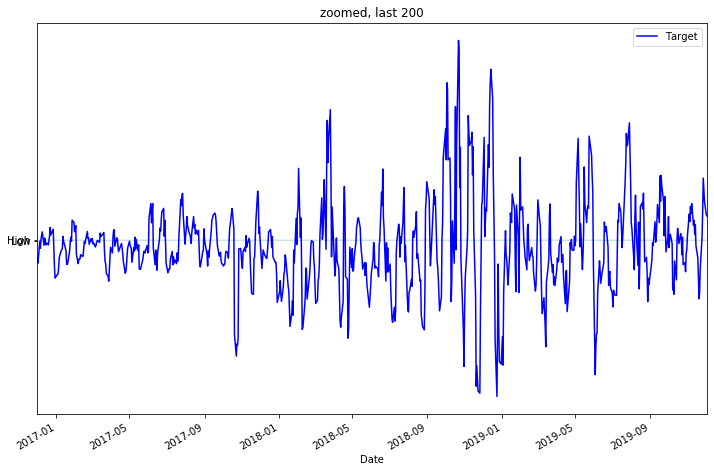

In [54]:
ax = df.plot( y='Target', c='b', figsize=(12,8),)
index = [str(item) for item in df.index]
plt.fill_between(x=index, y1='Low',y2='High', data=df, alpha=0.4)
plt.show()

p = df[200:].copy()
ax = p.plot( y='Target', c='b', figsize=(12,8))
index = [str(item) for item in p.index]
plt.fill_between(x=index, y1='Low', y2='High', data=p, alpha=0.4)
plt.title('zoomed, last 200')
plt.show()

In [55]:
# Scale and create datasets
target_index = df.columns.tolist().index('Target')
#high_index = df.columns.tolist().index('High')
#low_index = df.columns.tolist().index('Low')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Create y_scaler to inverse it later
y_scaler = MinMaxScaler(feature_range=(0, 1))
t_y = df['Close'].values.astype('float32')
t_y = np.reshape(t_y, (-1, 1))
y_scaler = y_scaler.fit(t_y)
    
# Set look_back to 20 which is 5 hours (15min*20)
X, y = create_dataset(dataset, look_back=20)
y = y[:,target_index]

In [56]:
# Set training data size
# We have a large enough dataset. So divid into 98% training / 1%  development / 1% test sets
train_size = int(len(X) * 0.99)
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

In [57]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense

# create a small LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
#model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(5, return_sequences=False))
#model.add(Dense(2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 50)            16000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 1120      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 37,326
Trainable params: 37,326
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# Save the best weight during training.
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(LeChemin+"TEST_BOOST/weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint]
history = model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Train on 832 samples, validate on 93 samples
Epoch 1/5
832/832 [==============================] - 19s 22ms/step - loss: 0.0175 - mae: 0.0914 - mse: 0.0175 - val_loss: 0.0106 - val_mae: 0.0772 - val_mse: 0.0106

Epoch 00001: val_mse improved from inf to 0.01063, saving model to TEST_BOOST/weights.best.hdf5
Epoch 2/5
832/832 [==============================] - 18s 21ms/step - loss: 0.0142 - mae: 0.0809 - mse: 0.0142 - val_loss: 0.0162 - val_mae: 0.0988 - val_mse: 0.0162

Epoch 00002: val_mse did not improve from 0.01063
Epoch 3/5
832/832 [==============================] - 17s 20ms/step - loss: 0.0140 - mae: 0.0798 - mse: 0.0140 - val_loss: 0.0113 - val_mae: 0.0800 - val_mse: 0.0113

Epoch 00003: val_mse did not improve from 0.01063
Epoch 4/5
832/832 [==============================] - 17s 20ms/step - loss: 0.0140 - mae: 0.0803 - mse: 0.0140 - val_loss: 0.0123 - val_mae: 0.0841 - val_mse: 0.0123

Epoch 00004: val_mse did not improve from 0.01063
Epoch 5/5
832/832 [==========================

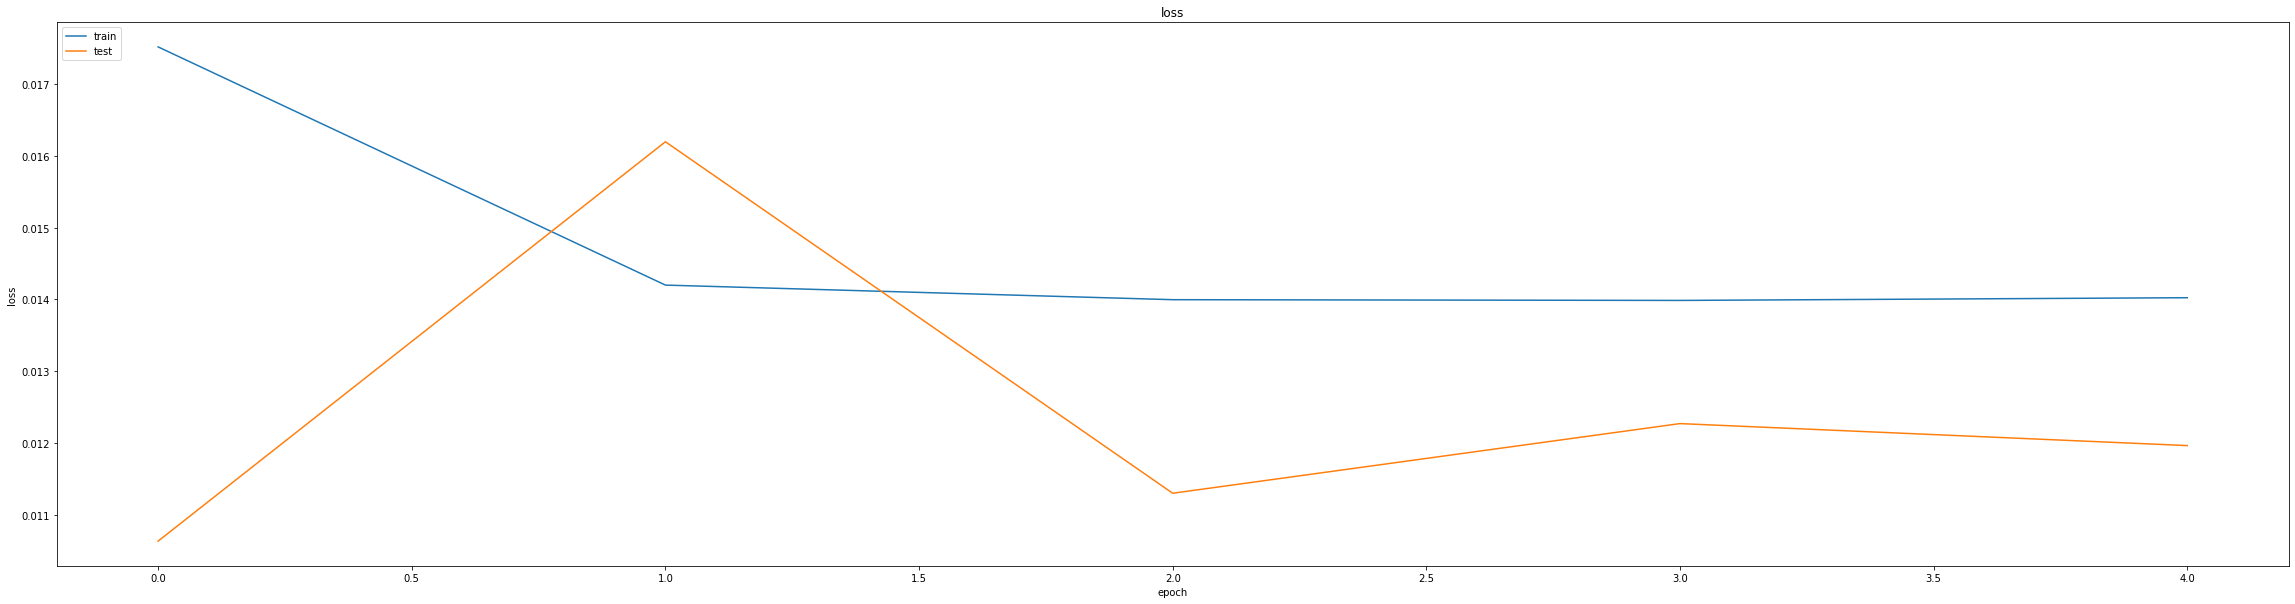

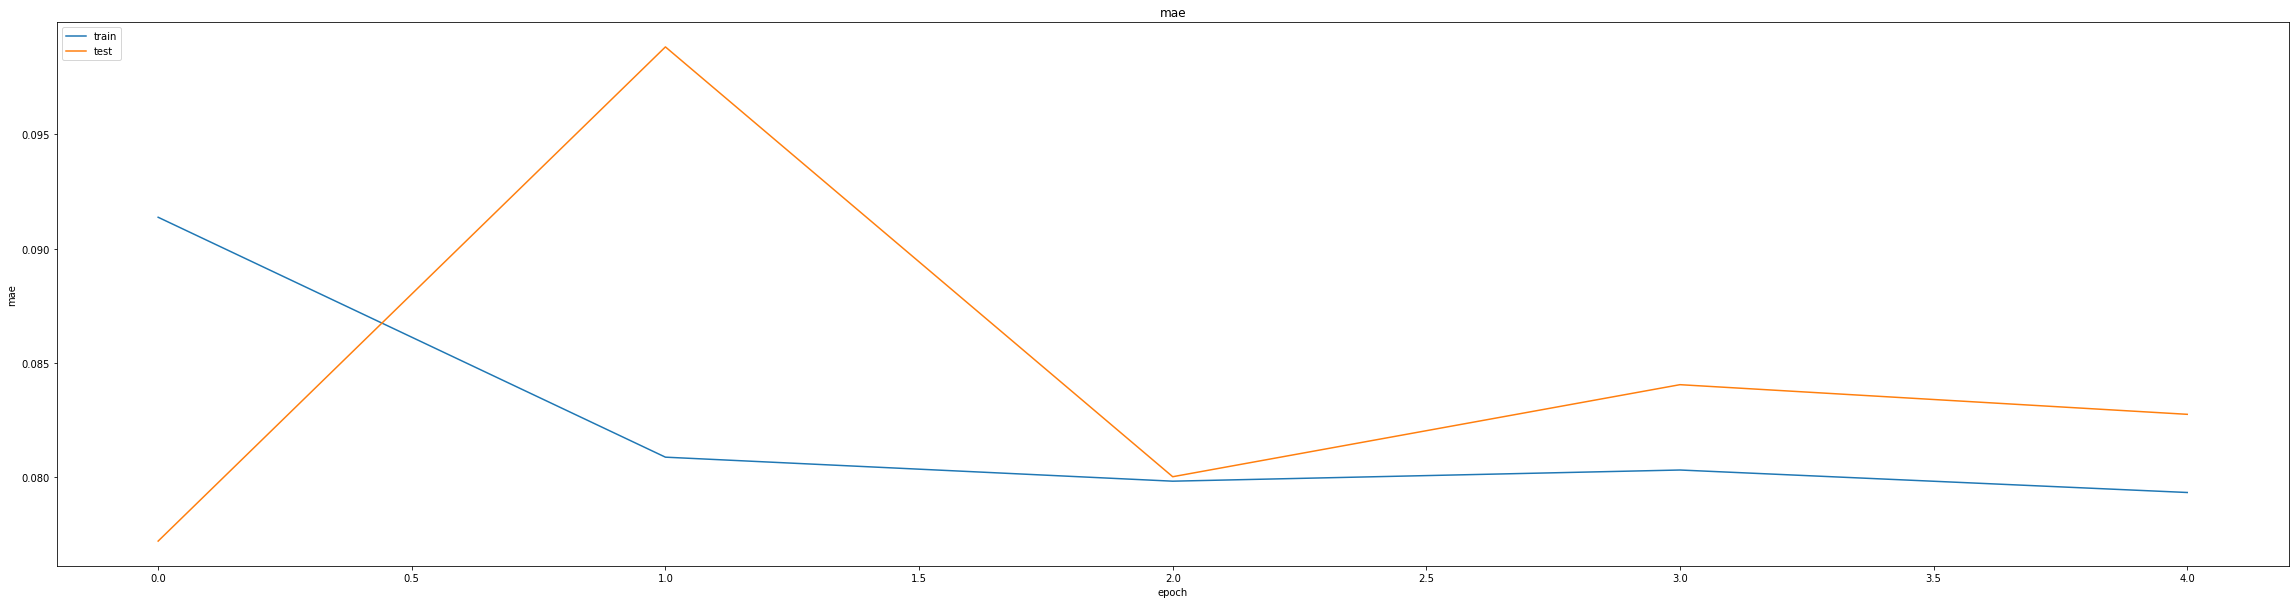

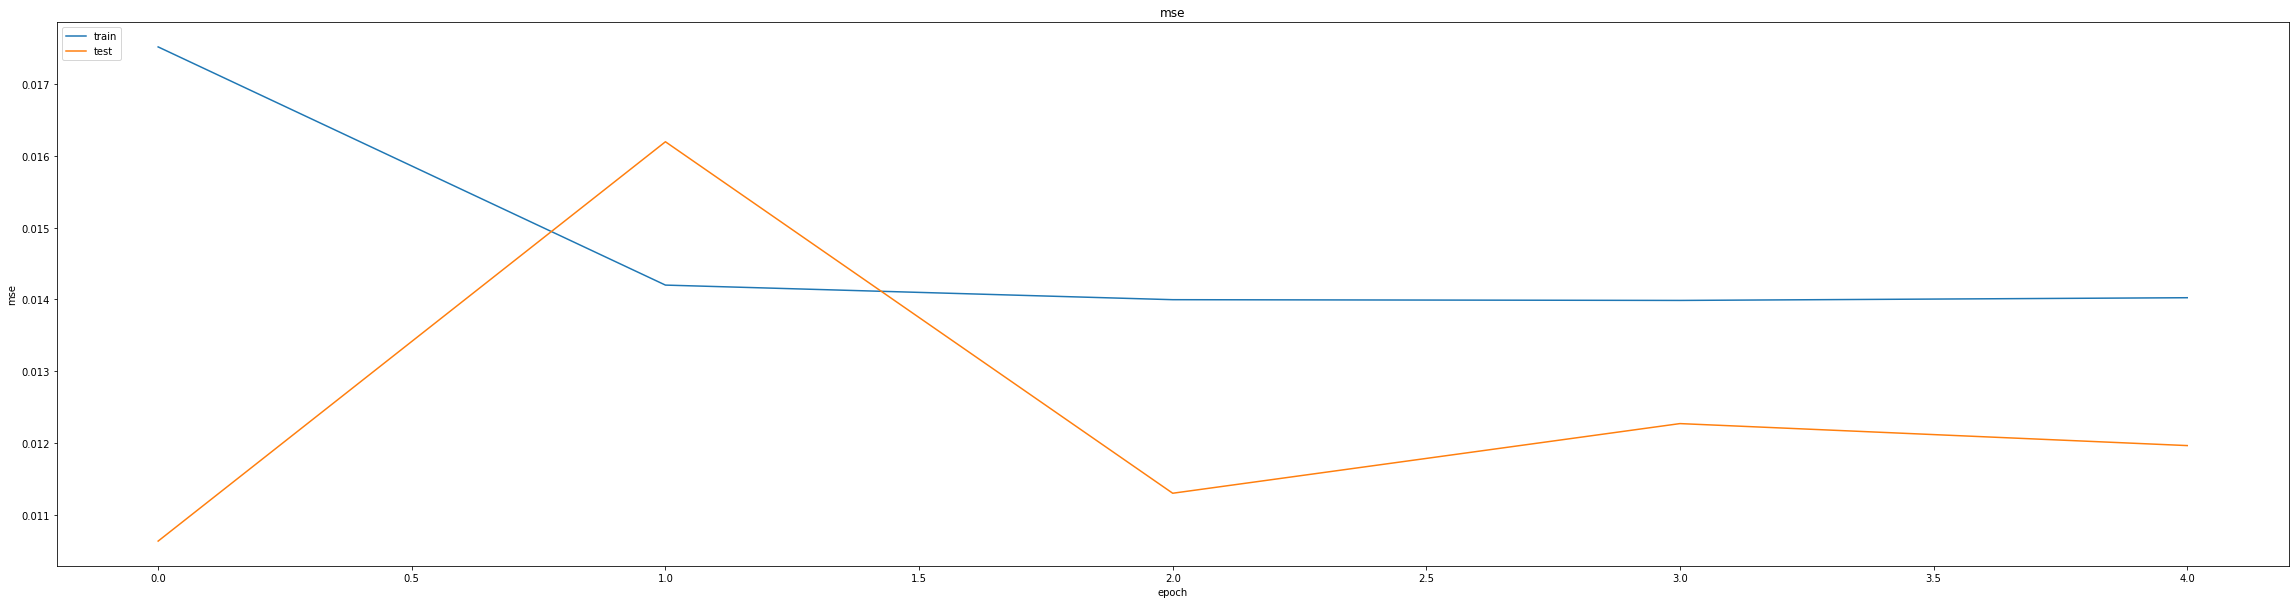

In [59]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [60]:
min(history.history['val_mse'])

0.010631146840751171

In [61]:
# Baby the model a bit
# Load the weight that worked the best
model.load_weights(LeChemin+"TEST_BOOST/weights.best.hdf5")

# Train again with decaying learning rate
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay]
history = model.fit(trainX, trainY, epochs=int(epoch), batch_size=4, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Train on 832 samples, validate on 93 samples
Epoch 1/5
832/832 [==============================] - 5s 5ms/step - loss: 0.0137 - mae: 0.0790 - mse: 0.0137 - val_loss: 0.0122 - val_mae: 0.0839 - val_mse: 0.0122

Epoch 00001: val_mse did not improve from 0.01063
Epoch 2/5
832/832 [==============================] - 5s 6ms/step - loss: 0.0137 - mae: 0.0789 - mse: 0.0137 - val_loss: 0.0146 - val_mae: 0.0932 - val_mse: 0.0146

Epoch 00002: val_mse did not improve from 0.01063
Epoch 3/5
lr changed to 0.0009000000427477062
832/832 [==============================] - 5s 5ms/step - loss: 0.0138 - mae: 0.0796 - mse: 0.0138 - val_loss: 0.0144 - val_mae: 0.0925 - val_mse: 0.0144

Epoch 00003: val_mse did not improve from 0.01063
Epoch 4/5
832/832 [==============================] - 5s 5ms/step - loss: 0.0137 - mae: 0.0792 - mse: 0.0137 - val_loss: 0.0156 - val_mae: 0.0967 - val_mse: 0.0156

Epoch 00004: val_mse did not improve from 0.01063
Epoch 5/5
lr changed to 0.0008100000384729356
832/832 [========

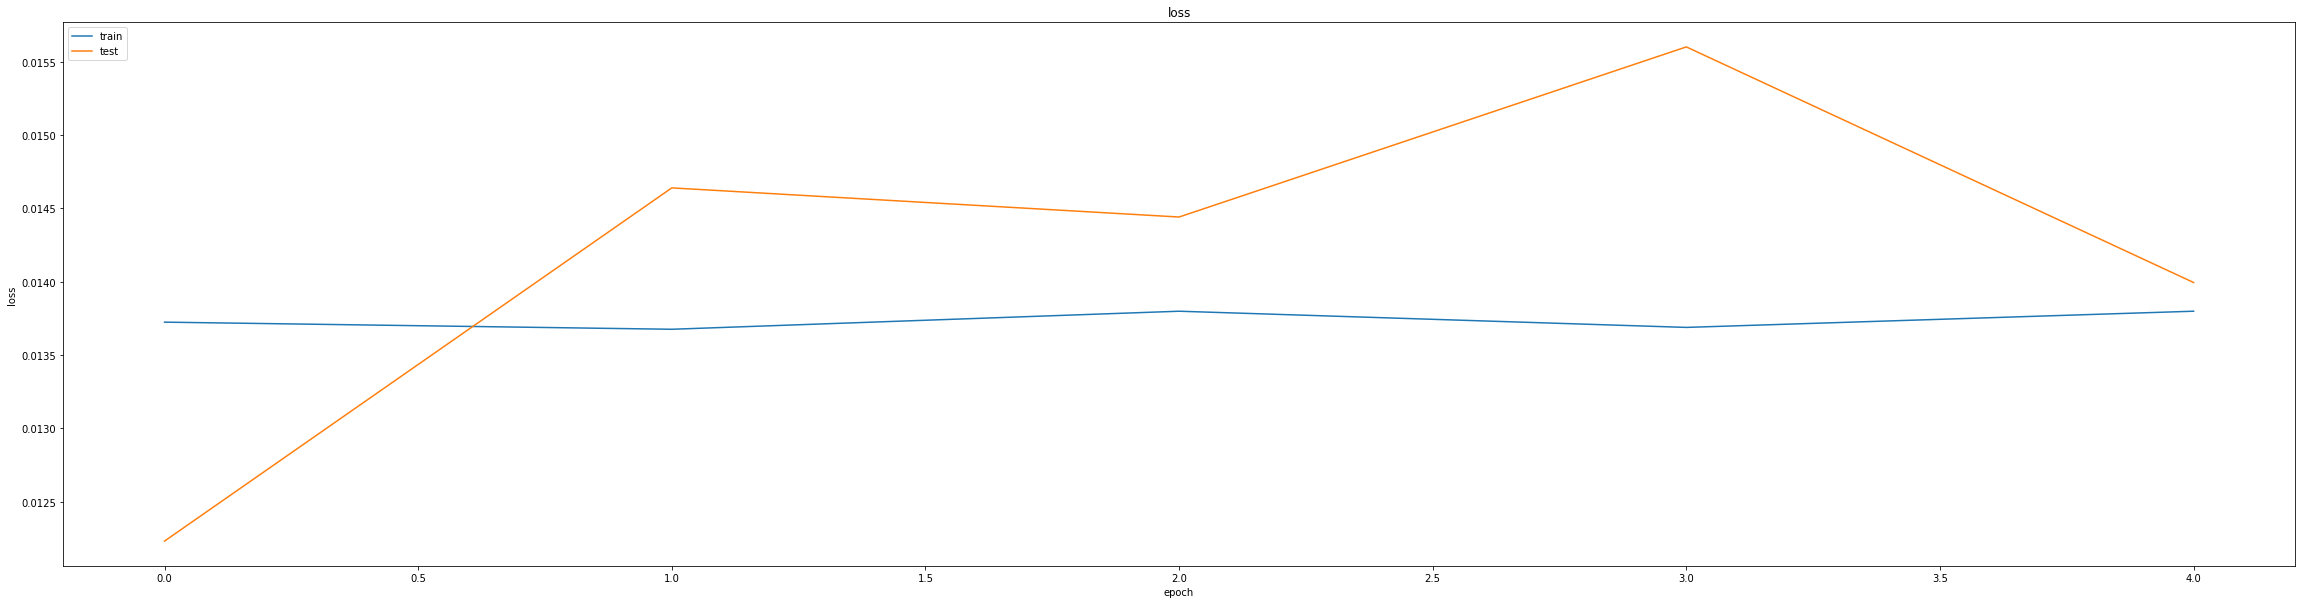

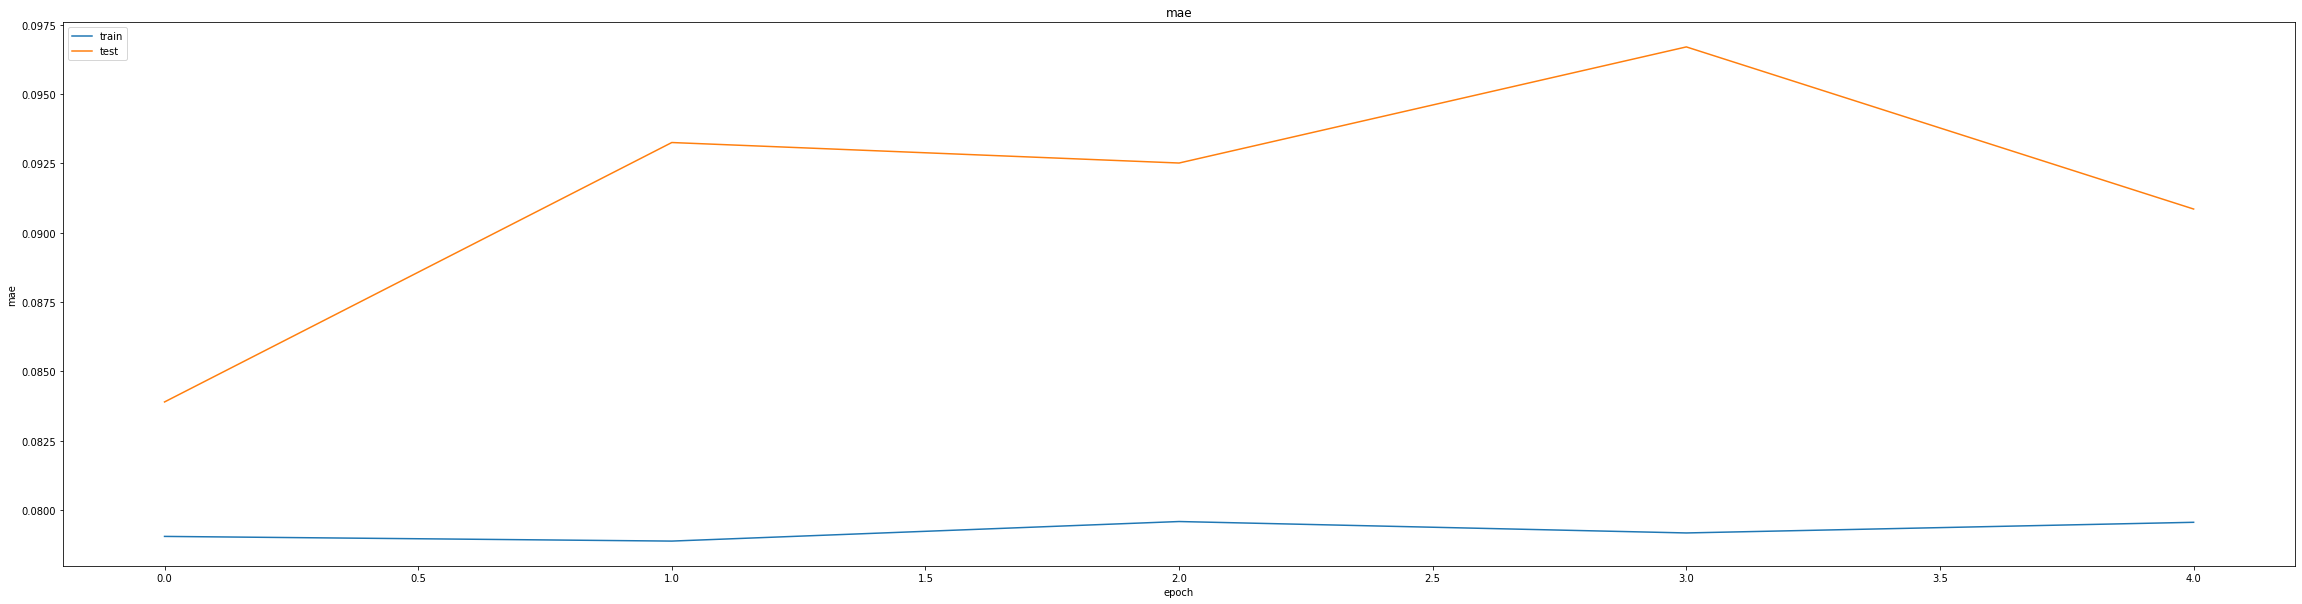

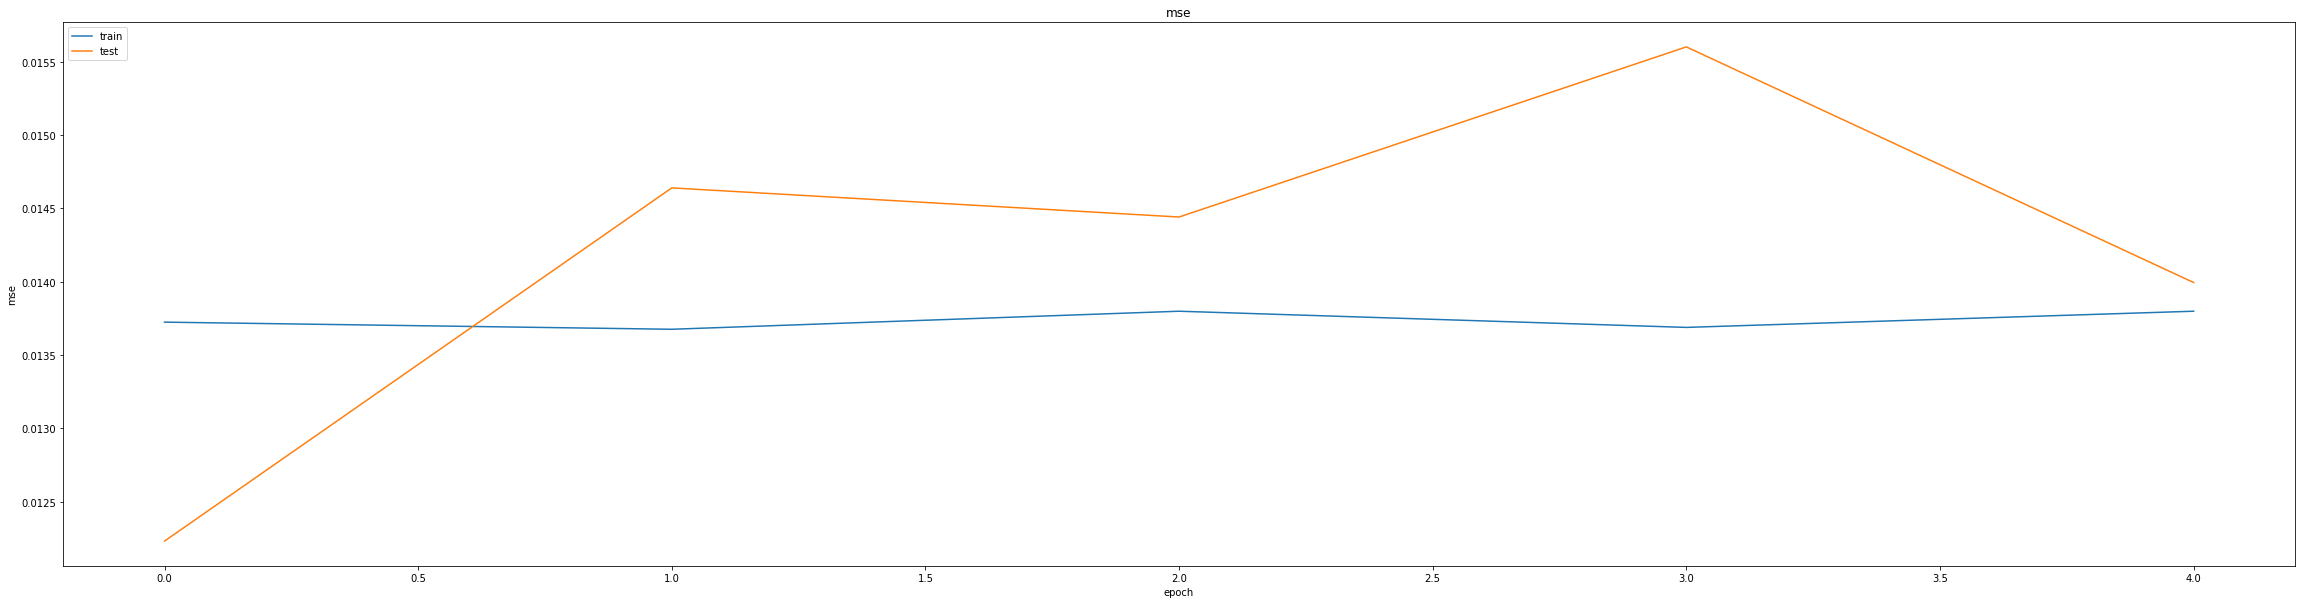

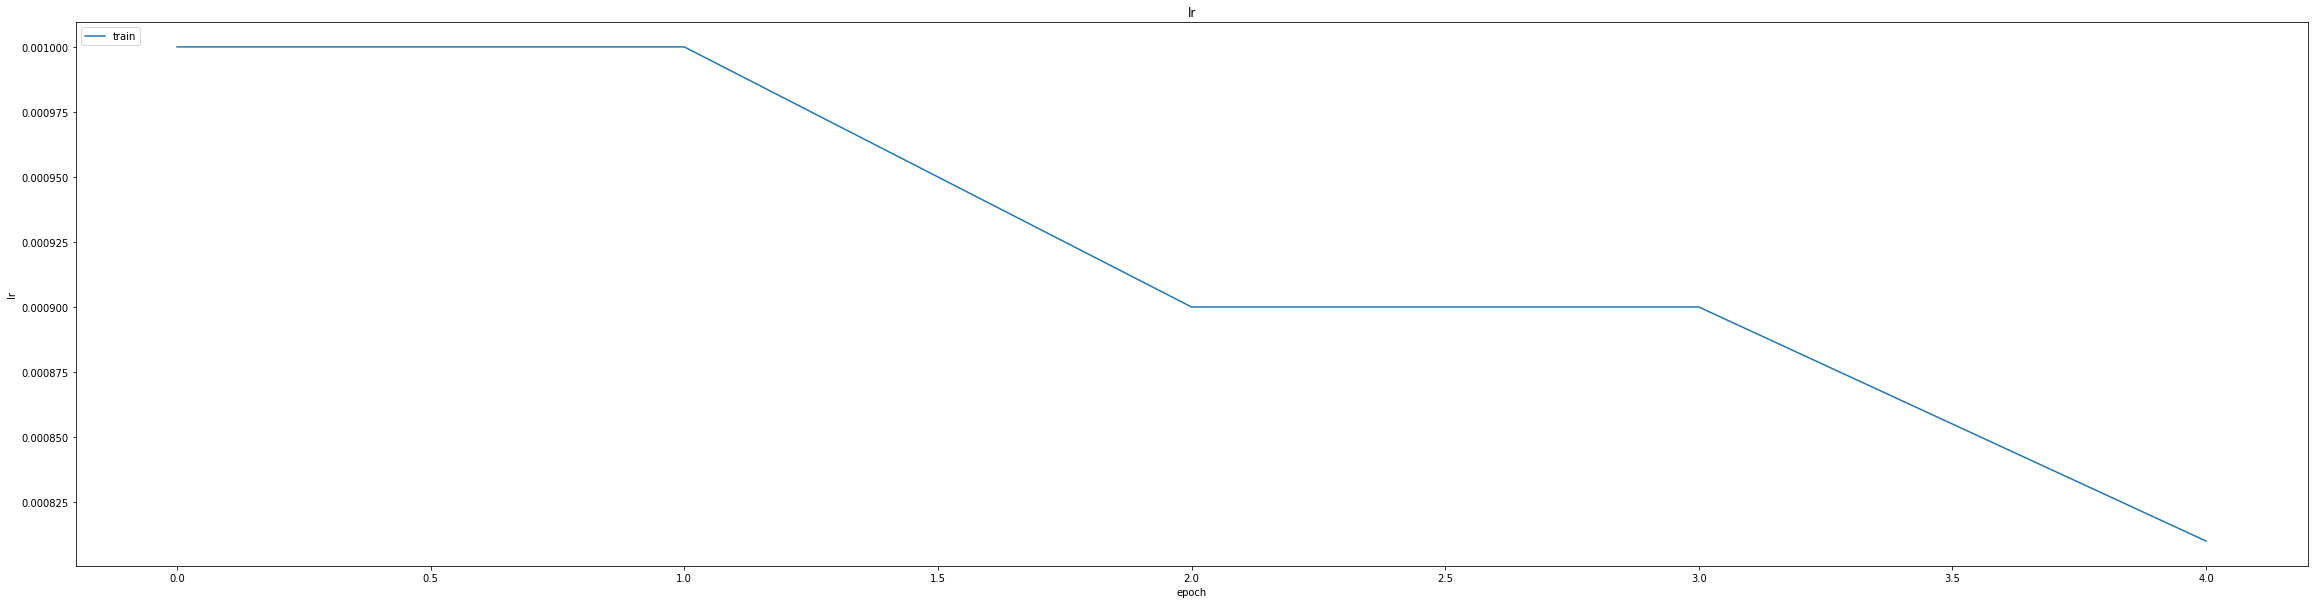

In [62]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        try:
            plt.plot(history.history['val_' + k])
        except:
            pass
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [63]:
min(history.history['val_mae'])

0.08389151841402054

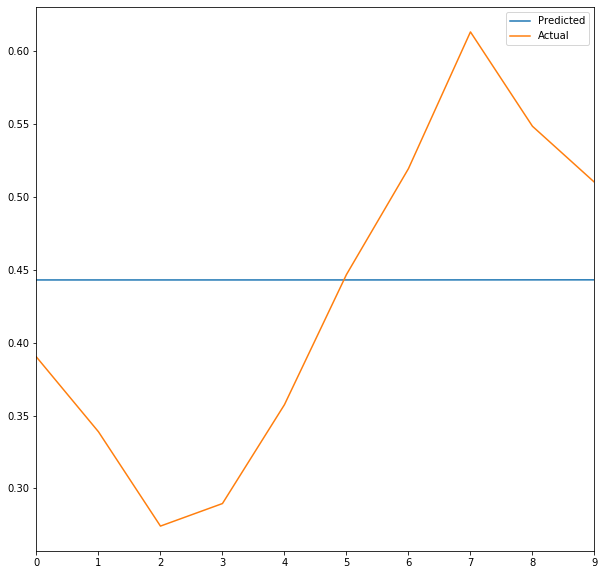

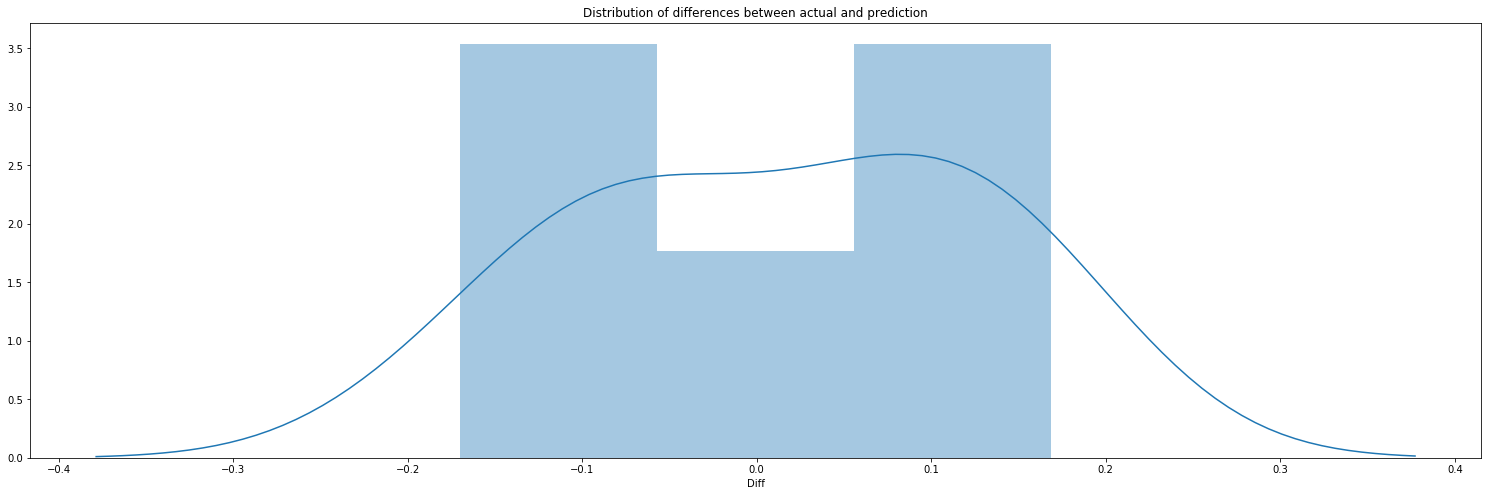

MSE :  0.012328786314413077
MAE :  0.09869549572467803


count    10.000000
mean      0.014229
std       0.116076
min      -0.170059
25%      -0.073971
50%       0.024582
75%       0.099458
max       0.168800
Name: Diff, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Benchmark
model.load_weights(LeChemin+"TEST_BOOST/weights.best.hdf5")

pred = model.predict(testX)

predictions = pd.DataFrame()
predictions['Predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['Actual'] = testY
predictions = predictions.astype(float)

predictions.plot(figsize=(10,10))
plt.show()

predictions['Diff'] = predictions['Predicted'] - predictions['Actual']
plt.figure(figsize=(26,8))
sns.distplot(predictions['Diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

print("MSE : ", mean_squared_error(predictions['Predicted'].values, predictions['Actual'].values))
print("MAE : ", mean_absolute_error(predictions['Predicted'].values, predictions['Actual'].values))
predictions['Diff'].describe()

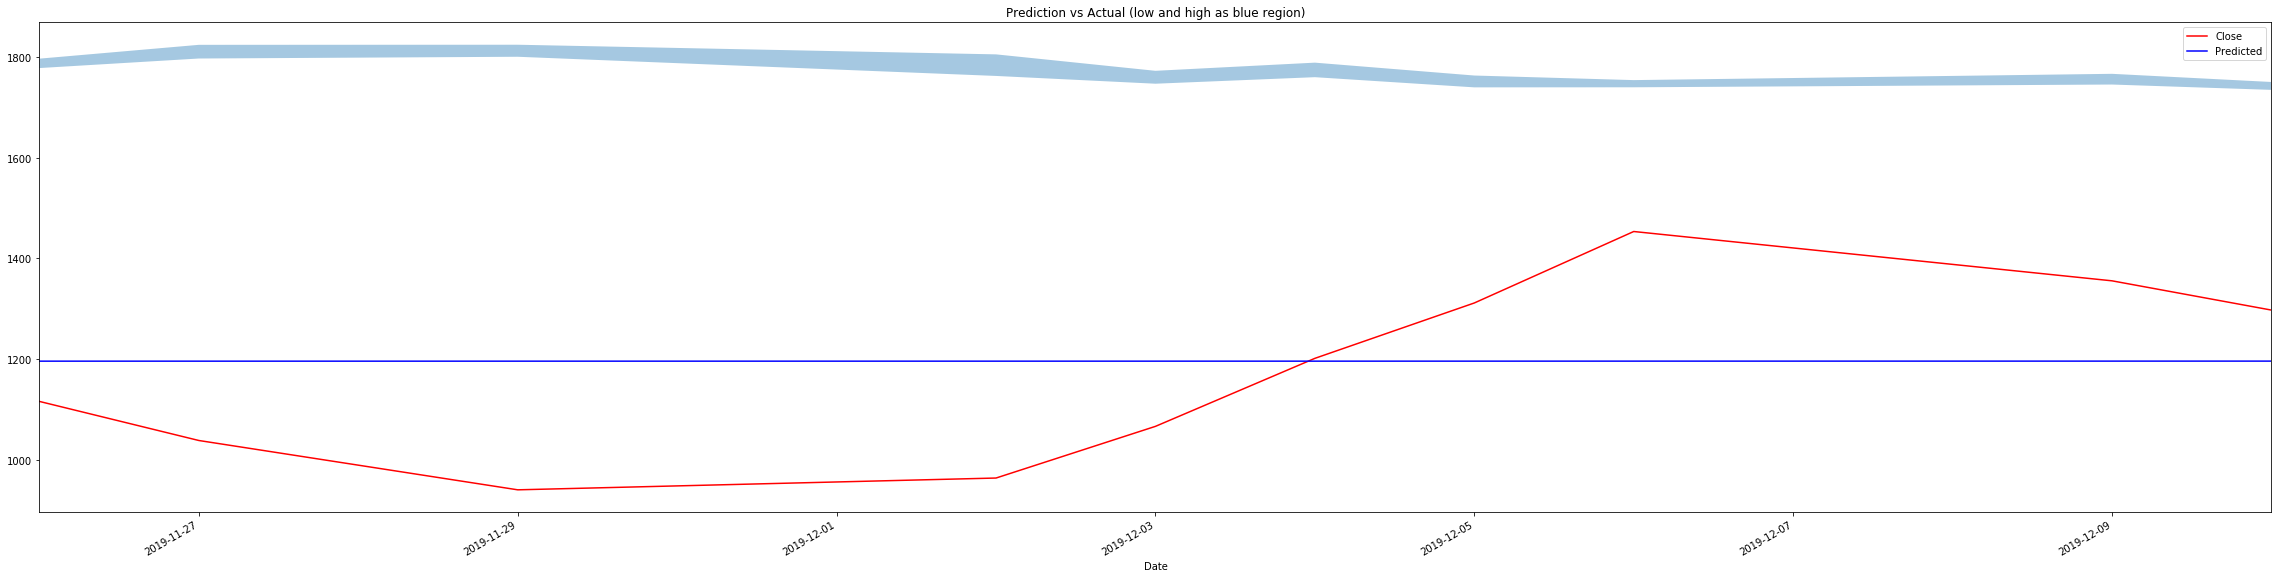

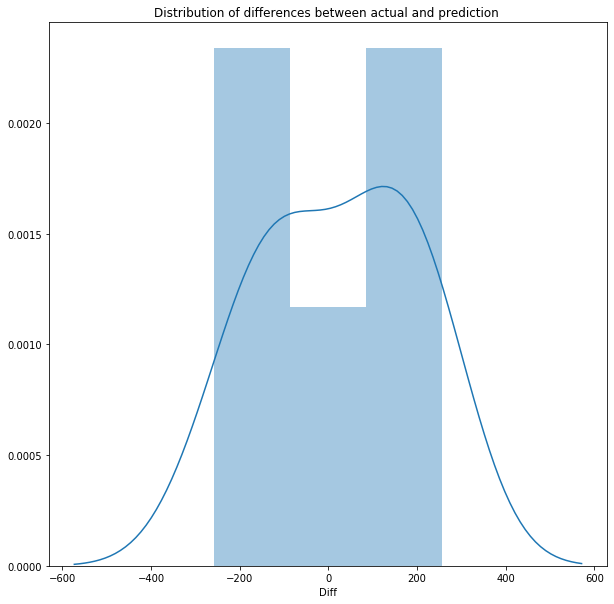

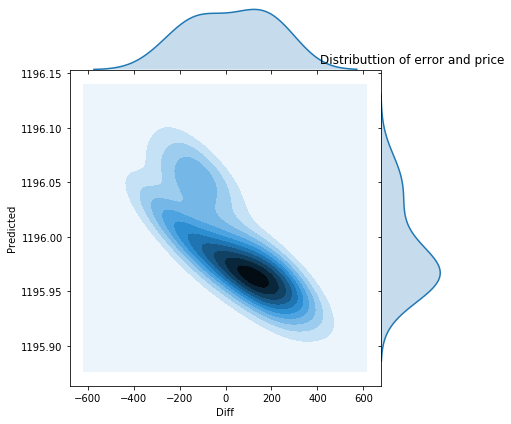

MSE :  28279.044447417557
MAE :  149.47532958984374


count     10.000000
mean      21.550183
std      175.798603
min     -257.556885
25%     -112.030365
50%       37.228943
75%      150.630463
max      255.649292
Name: Diff, dtype: float64

In [65]:
pred = model.predict(testX)
pred = y_scaler.inverse_transform(pred)
close = y_scaler.inverse_transform(np.reshape(testY, (testY.shape[0], 1)))
predictions = pd.DataFrame()
predictions['Predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['Close'] = pd.Series(np.reshape(close, (close.shape[0])))

p = LaBase[LaBase['Symbol']=='AMZN'][['High','Low']][-pred.shape[0]:].copy()
predictions.index = p.index
predictions = predictions.astype(float)
predictions = predictions.merge(p[['Low', 'High']], right_index=True, left_index=True)

ax = predictions.plot(y='Close', c='red', figsize=(40,10))
ax = predictions.plot(y='Predicted', c='blue', figsize=(40,10), ax=ax)
index = [str(item) for item in predictions.index]
plt.fill_between(x=index, y1='Low', y2='High', data=p, alpha=0.4)
plt.title('Prediction vs Actual (low and high as blue region)')
plt.show()

predictions['Diff'] = predictions['Predicted'] - predictions['Close']
plt.figure(figsize=(10,10))
sns.distplot(predictions['Diff']);
plt.title('Distribution of differences between actual and prediction ')
plt.show()

g = sns.jointplot("Diff", "Predicted", data=predictions, kind="kde", space=0)
plt.title('Distributtion of error and price')
plt.show()

# predictions['correct'] = (predictions['predicted'] <= predictions['high']) & (predictions['predicted'] >= predictions['low'])
# sns.factorplot(data=predictions, x='correct', kind='count')

print("MSE : ", mean_squared_error(predictions['Predicted'].values, predictions['Close'].values))
print("MAE : ", mean_absolute_error(predictions['Predicted'].values, predictions['Close'].values))
predictions['Diff'].describe()

In [66]:
predictions

,Predicted,Close,Low,High,Diff
Date,,,,,
2019-11-26,1195.962036,1115.930664,1778.349976,1797.030029,80.031372
2019-11-27,1195.955322,1038.300293,1797.310059,1824.500000,157.655029
2019-11-29,1195.959351,940.310059,1800.790039,1824.689941,255.649292
2019-12-02,1195.963135,963.728027,1762.680054,1805.550049,232.235107
2019-12-03,1195.965454,1066.408691,1747.229980,1772.869995,129.556763
2019-12-04,1195.974976,1201.548462,1760.219971,1789.089966,-5.573486
2019-12-05,1195.986328,1311.570312,1740.000000,1763.500000,-115.583984
2019-12-06,1196.019165,1453.576050,1740.130005,1754.400024,-257.556885
2019-12-09,1196.044312,1355.586182,1745.609985,1766.890015,-159.541870


In [67]:
predictions['%'] = (predictions['Close'].shift(-5)-predictions['Predicted'])*100/predictions['Close'].shift(-5)

In [68]:
predictions

,Predicted,Close,Low,High,Diff,%
Date,,,,,,
2019-11-26,1195.962036,1115.930664,1778.349976,1797.030029,80.031372,0.464936
2019-11-27,1195.955322,1038.300293,1797.310059,1824.500000,157.655029,8.815005
2019-11-29,1195.959351,940.310059,1800.790039,1824.689941,255.649292,17.722960
2019-12-02,1195.963135,963.728027,1762.680054,1805.550049,232.235107,11.775205
2019-12-03,1195.965454,1066.408691,1747.229980,1772.869995,129.556763,7.820490
2019-12-04,1195.974976,1201.548462,1760.219971,1789.089966,-5.573486,NaN
2019-12-05,1195.986328,1311.570312,1740.000000,1763.500000,-115.583984,NaN
2019-12-06,1196.019165,1453.576050,1740.130005,1754.400024,-257.556885,NaN
2019-12-09,1196.044312,1355.586182,1745.609985,1766.890015,-159.541870,NaN


In [71]:
model.predict(scaler.fit_transform(df.iloc[-1,:]))  

ValueError: Expected 2D array, got 1D array instead:
array=[-8.66600000e+05  1.76995996e+03 -3.36736319e+07  2.56400146e+01
 -9.95996094e+00 -9.95996094e+00  2.56400146e+01  4.92665154e+01
  2.07334846e+01  1.92665154e+01  5.35555792e+01  1.58020081e+01
  5.71998901e+00  4.33833008e+00  1.15966797e+00 -6.92100016e+00
 -2.32717750e-01  6.30921108e+00  4.25160862e+00  2.09069119e+00
  4.78457930e+01  6.88189859e+01  5.40823597e-01  6.46489710e-01
  7.77777778e+01  2.22222222e+01  5.55555556e+01  3.07500000e+01
 -4.09472640e+07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
LeChemin+"TEST_BOOST/weights_best.hdf5"